# Effect of uncertainty
Consider the following case:
- We find out that we recieved massive rainfall with a varying range over an extended time period of 10 hours
- Which also implies that:
 - There is no evaporation
 - Farmers did not take water out of the lake to irrigate their farmlands
 
 <center><font color=blue>How does it impact the lake's water level?</font></center>

# Step 4. Write down the assumptions
In addition to the previous assumptions, asssume that the rainfall can be represented by:
\begin{equation}
\ F_{rain}=F_{rain, avg} + \Delta F_{rain}*cos(0.01t)
\end{equation}

|Variable|Meaning|Value|
|--- | --- | ---|
|$F_{rain, avg}$ | Average rainfall rate (Mg) |288
|$\Delta F_{rain}$ | Change in rainfall (Mg/min) |180

# Step 6. Implement the equations and run the simulation

## 6.1 Import packages needed to run the simulation

In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

## 6.2 Create a model and define the parameters and variables

In [13]:
m = GEKKO() # create GEKKO model
m.time = np.linspace(0,600,150) # define the time over which to solve the model

# define the constant parameters
rho = m.Const(value = 1000)
A = m.Const(value = 100)
Frainav = m.Const(value = 288)
delFrain = m.Const(value = 180)

# define the varibles.
# Note in this instance since we're not altering them over the course of the simulation they are defined as constants
Fstream = m.Const(value = 10.8)
Fground = m.Const(value = 0.6)
Fpump = m.Const(value = 100)

# for this instance these are true variables and will change over the course of the simulation
M = m.Var(value = 1e6)
V = m.Var(value = 1000)
h = m.Var(value = 10)
Frain = m.Var(value = 468)
t = m.Param(value=m.time)

## 6.3 Define the equations

In [14]:
m.Equation(M.dt() == Frain+Fstream-Fground-Fpump) # our balance equation
m.Equation(M == rho*V) # static equation relating mass and volume
m.Equation(V == A*h) # static equation relating volume and lake height
m.Equation(Frain == Frainav+delFrain*(m.cos(0.01*t)))

## 6.4 Setup the solver and run the simulation

Text(0, 0.5, 'Lake height (m)')

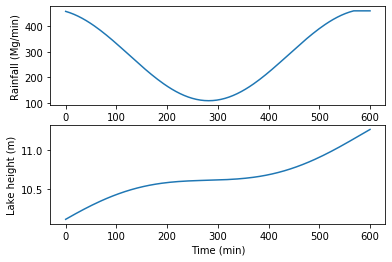

In [23]:
m.options.IMODE = 4 # Dynamic simulation with simultaneous solution of equations
m.solve(disp=False)

ax1=plt.subplot(2,1,1)
plt.plot(m.time,Frain.value)
plt.xlabel('Time (min)')
plt.ylabel('Rainfall (Mg/min)')
ax2=plt.subplot(2,1,2, sharex=ax1)
plt.plot(m.time,h.value)
plt.xlabel('Time (min)')
plt.ylabel('Lake height (m)')